In [2]:
# Import packages
import xarray as xr
import numpy as np
import math
import matplotlib.pyplot as plt

# Verifying WW3 wave equation calculation

In [11]:
np.max([1, 1-beta*dt])

1.18

In [38]:
def analytical_solver(N_t, beta, dt):
    return N_t*np.exp(beta*dt)

def semi_implicit_solver(N_t, beta, dt):
    return N_t*((1+beta*dt)/np.max([1, 1-beta*dt]))

def time_splitting_solver(N_t, gamma, alpha, c_g, dt):
    N_star = N_t*((1+gamma*dt)/np.max([1, 1-gamma*dt]))
    return N_star*np.exp(-alpha*c_g*dt)


dt = 100
beta = 9*10**(-5)

frequency = 0.2
c_g = 0.8*(1/frequency)
alpha = 10**(-4)
gamma = beta + alpha*c_g
N_0 = 1


n_points = 100
dt_range = np.linspace(0,2000, n_points)
analytical_solution = np.zeros(n_points)
semi_implicit_solution = np.zeros(n_points)
time_splitting_solution = np.zeros(n_points)
for i, dt in enumerate(dt_range):
    analytical_solution[i] = analytical_solver(N_0, beta, dt)
    semi_implicit_solution[i] = semi_implicit_solver(N_0, beta, dt)
    time_splitting_solution[i] = time_splitting_solver(N_0, gamma, alpha, c_g, dt)

Text(0, 0.5, '$N(t+dt)$')

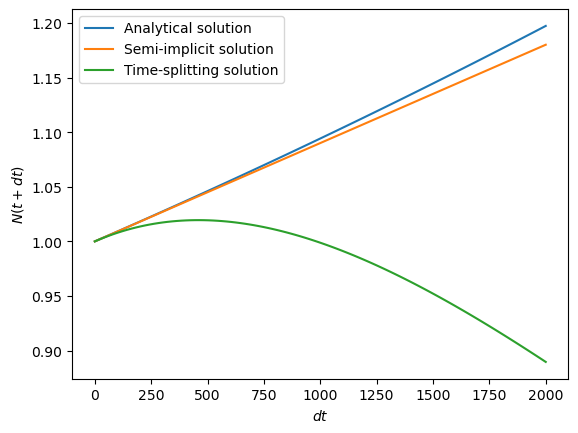

In [39]:
plt.plot(dt_range, analytical_solution, label='Analytical solution')
plt.plot(dt_range, semi_implicit_solution, label='Semi-implicit solution')
plt.plot(dt_range, time_splitting_solution, label='Time-splitting solution')
plt.legend()
plt.xlabel('$dt$')
plt.ylabel('$N(t+dt)$')